基于numpy实现

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数

In [3]:
def target_function(x):
    return np.cos(x) + x * 0.5 - 2

# 数据准备

In [4]:
def generate_data(num_samples=1000,test_ratio=0.2):
    np.random.seed(42)
    x= np.random.uniform(-2 * np.pi,2 * np.pi,num_samples) # 取-2pi到2pi之间的数据
    y= target_function(x)

    split_idx = int(num_samples * (1 - test_ratio)) # 按照0.8 0.2划分
    x_train, x_test = x[:split_idx], x[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = generate_data()

# 模型定义

In [5]:
class Net:
    def __init__(self,hidden_size=100):
        self.W1=np.random.randn(1,hidden_size)
        self.W2=np.random.randn(hidden_size,1)
        self.b1=np.random.randn(hidden_size)
        self.b2=np.random.randn(1)
    def relu(self,x):
        return np.maximum(0,x)
    def forward(self,x):
        # 前向传播
        self.x = x
        self.h = self.relu(np.matmul(x,self.W1)+self.b1)
        self.y_pred=np.matmul(self.h,self.W2)+self.b2
        return self.y_pred
    def backward(self, grad_y):
        # 反向传播,计算梯度的过程

        # y = h @ W2 + b2
        grad_W2 = np.matmul(self.h.T, grad_y)  # 输出层权重梯度
        grad_b2 = np.sum(grad_y, axis=0)  # 输出层偏置梯度
        grad_h = np.matmul(grad_y, self.W2.T)  # 隐藏层梯度
        
        # 经过ReLU之前的梯度
        grad_h[self.h <= 0] = 0  # ReLU 梯度
        
        # h = x @ W1 + b1
        grad_W1 = np.matmul(self.x.T, grad_h)  # 隐藏层权重梯度
        grad_b1 = np.sum(grad_h, axis=0)  # 隐藏层偏置梯度
        
        return grad_W1, grad_b1, grad_W2, grad_b2
    def update_params(self, grad_W1, grad_b1, grad_W2, grad_b2, lr=0.01):
        # 更新参数，实际上对参数进行更新的过程
        self.W1 -= lr * grad_W1
        self.b1 -= lr * grad_b1
        self.W2 -= lr * grad_W2
        self.b2 -= lr * grad_b2        

# 模型训练

In [6]:
def train(model, x_train, y_train, epochs=1000, lr=0.001):
    losses = []
    for epoch in range(epochs):
        # 前向传播
        y_pred = model.forward(x_train.reshape(-1, 1))
        
        # 计算损失，MSE损失
        loss = np.mean((y_pred - y_train.reshape(-1, 1)) ** 2)
        losses.append(loss)
        
        # 反向传播 2*(y-y_pred)
        grad_y = 2 * (y_pred - y_train.reshape(-1, 1)) / len(x_train)
        grad_W1, grad_b1, grad_W2, grad_b2 = model.backward(grad_y)
        
        # 更新参数
        model.update_params(grad_W1, grad_b1, grad_W2, grad_b2, lr)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return losses

# 初始化模型
model = Net(hidden_size=100)

# 训练模型
losses = train(model, x_train, y_train, epochs=1000, lr=0.001)

Epoch 0, Loss: 482.795453164568
Epoch 10, Loss: 7.898331892165914
Epoch 20, Loss: 4.484172524369003
Epoch 30, Loss: 3.1153455360884754
Epoch 40, Loss: 2.3199276012565395
Epoch 50, Loss: 1.7548875308872924
Epoch 60, Loss: 1.3388140256077805
Epoch 70, Loss: 1.0479455971751044
Epoch 80, Loss: 0.8568595924441195
Epoch 90, Loss: 0.7227703773191685
Epoch 100, Loss: 0.6247138128754931
Epoch 110, Loss: 0.5511888862182862
Epoch 120, Loss: 0.49442487170741595
Epoch 130, Loss: 0.44935541554414243
Epoch 140, Loss: 0.41271949740926844
Epoch 150, Loss: 0.38240985291309854
Epoch 160, Loss: 0.35697279309481944
Epoch 170, Loss: 0.3352595656633436
Epoch 180, Loss: 0.3165240359915507
Epoch 190, Loss: 0.30011818209396224
Epoch 200, Loss: 0.2856631904881013
Epoch 210, Loss: 0.2727640552052688
Epoch 220, Loss: 0.2611547979088488
Epoch 230, Loss: 0.250616528219145
Epoch 240, Loss: 0.24093509939204225
Epoch 250, Loss: 0.23197978614668774
Epoch 260, Loss: 0.22365356494655786
Epoch 270, Loss: 0.2158867250300117

# 模型测试

Test MSE Loss: 0.0623


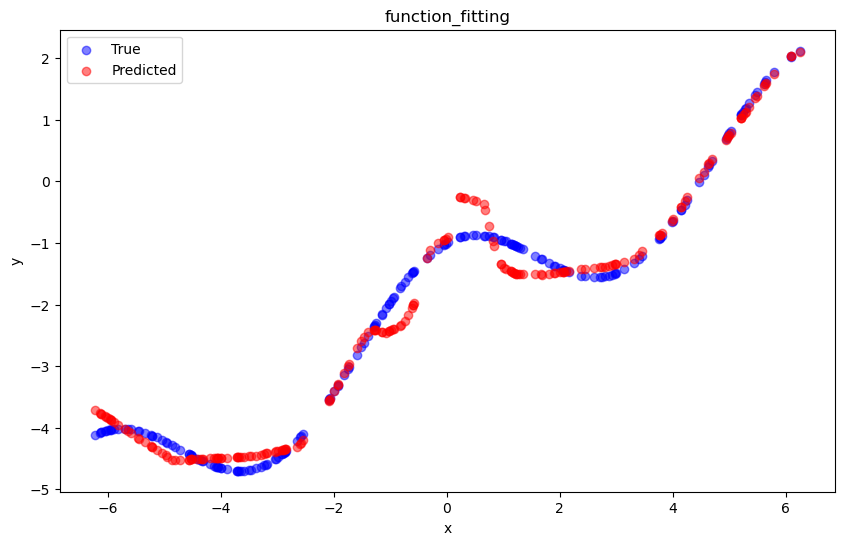

In [8]:
# 测试模型
y_pred_test = model.forward(x_test.reshape(-1, 1))

# 计算测试集的 MSE 损失值
mse_loss = np.mean((y_test - y_pred_test.flatten()) ** 2)
print(f"Test MSE Loss: {mse_loss:.4f}")

# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, label="True", color="blue", alpha=0.5)
plt.scatter(x_test, y_pred_test, label="Predicted", color="red", alpha=0.5)
plt.legend()
plt.title("function_fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.show()